In [1]:
from google.colab import drive
drive.mount("/content/drive")

# setup credential
!wget -q https://raw.githubusercontent.com/tsunrise/colab-github/main/colab_github.py
import colab_github
colab_github.github_auth(persistent_key=True)

# go to directory
%cd /content/drive/MyDrive/Colab\ Notebooks/EECS_442_HOI

Mounted at /content/drive
Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
Looks that a private key is already created. If you have already push it to github, no action required.
 Otherwise, Please go to https://github.com/settings/ssh/new to upload the following key: 
ssh-ed25519 AAAAC3NzaC1lZDI1NTE5AAAAICeyklL46g42c+kOiDGQYpBIkUVa8Oott1qwDIqq8fti root@8ae8a1039f30

Please use SSH method to clone repo.
/content/drive/MyDrive/Colab Notebooks/EECS_442_HOI


In [ ]:
!pip install ultralytics

In [54]:
from ultralytics import YOLO

# Load a model
model = YOLO('yolov8n-pose.pt')  # load an official model
# model = YOLO('path/to/best.pt')  # load a custom model

# Predict with the model
results = model('me.jpg')  # predict on an image


image 1/1 /content/drive/MyDrive/Colab Notebooks/EECS_442_HOI/me.jpg: 640x480 1 person, 225.3ms
Speed: 5.6ms preprocess, 225.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)


results type reference: https://docs.ultralytics.com/reference/engine/results/#ultralytics.engine.results.Masks.__init__

In [55]:
for result in results:
    boxes = result.boxes  # Boxes object for bbox outputs
    masks = result.masks  # Masks object for segmentation masks outputs
    keypoints = result.keypoints  # Keypoints object for pose outputs
    probs = result.probs  # Probs object for classification outputs
    print(keypoints)

ultralytics.engine.results.Keypoints object with attributes:

conf: tensor([[0.9947, 0.9791, 0.9767, 0.8622, 0.8053, 0.9988, 0.9988, 0.9935, 0.9932, 0.9838, 0.9845, 0.9998, 0.9998, 0.9992, 0.9993, 0.9891, 0.9902]])
data: tensor([[[6.8873e+02, 4.8118e+02, 9.9467e-01],
         [7.1264e+02, 4.5974e+02, 9.7914e-01],
         [6.6462e+02, 4.6079e+02, 9.7674e-01],
         [7.4962e+02, 4.7582e+02, 8.6216e-01],
         [6.3317e+02, 4.7888e+02, 8.0534e-01],
         [8.0421e+02, 6.1899e+02, 9.9883e-01],
         [5.8818e+02, 6.1893e+02, 9.9876e-01],
         [9.3230e+02, 7.3872e+02, 9.9348e-01],
         [4.6271e+02, 7.3188e+02, 9.9322e-01],
         [1.0683e+03, 8.4854e+02, 9.8381e-01],
         [3.3851e+02, 8.2745e+02, 9.8453e-01],
         [7.4832e+02, 9.5674e+02, 9.9980e-01],
         [6.1623e+02, 9.5496e+02, 9.9980e-01],
         [7.4368e+02, 1.2295e+03, 9.9922e-01],
         [5.9455e+02, 1.2277e+03, 9.9930e-01],
         [7.3588e+02, 1.4376e+03, 9.8912e-01],
         [5.6489e+02, 1.440

In [56]:
from PIL import Image
# Show the results
for r in results:
    im_array = r.plot()  # plot a BGR numpy array of predictions
    im = Image.fromarray(im_array[..., ::-1])  # RGB PIL image
    im.show()  # show image
    im.save('me_pose_results.jpg')  # save image

tensor(688.7294)
tensor(712.6423)
tensor(664.6217)
tensor(749.6151)
tensor(633.1743)
tensor(804.2055)
tensor(588.1779)
tensor(932.3011)
tensor(462.7106)
tensor(1068.2789)
tensor(338.5097)
tensor(748.3243)
tensor(616.2258)
tensor(743.6795)
tensor(594.5466)
tensor(735.8828)
tensor(564.8860)


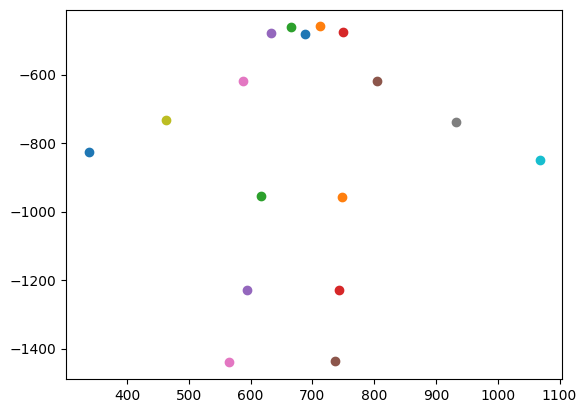

In [58]:
import matplotlib.pyplot as plt


plt.figure()

for i, k in enumerate(keypoints.xy[0]):
  x_coord, y_coord = k[0], k[1]
  print(x_coord)
  plt.scatter(x_coord, -y_coord)

# print(keypoints.xy[0])
# print(keypoints.xy[0][:,1])
# plt.figure()
# plt.plot(keypoints.xy[0][:,0], keypoints.xy[0][:,1])